## Song_dataset Model

Making a High accuracy 'song_popularity' prediction model. The model is execute through passing following steps:
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

In [ ]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset

df = pd.read_csv('song_data.csv')

df.drop(['song_name'], axis=1, inplace=True)
display(df.head())

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



Inference: The Datset consists of 14 features & 18835 samples.


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


---

# <center> 2. Exploratory Data Analysis (EDA)

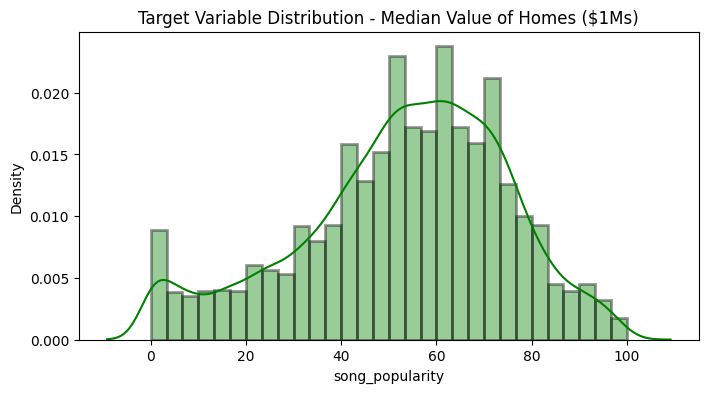

In [ ]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

- The Target Variable seems to be be normally distributed around 60 units

                                 Numeric Features Distribution                                  


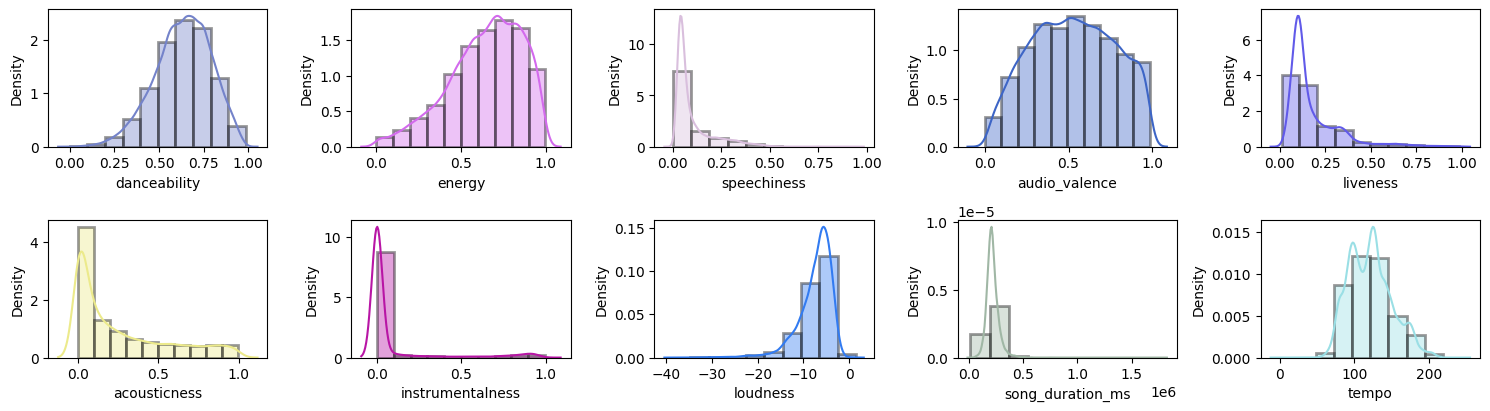

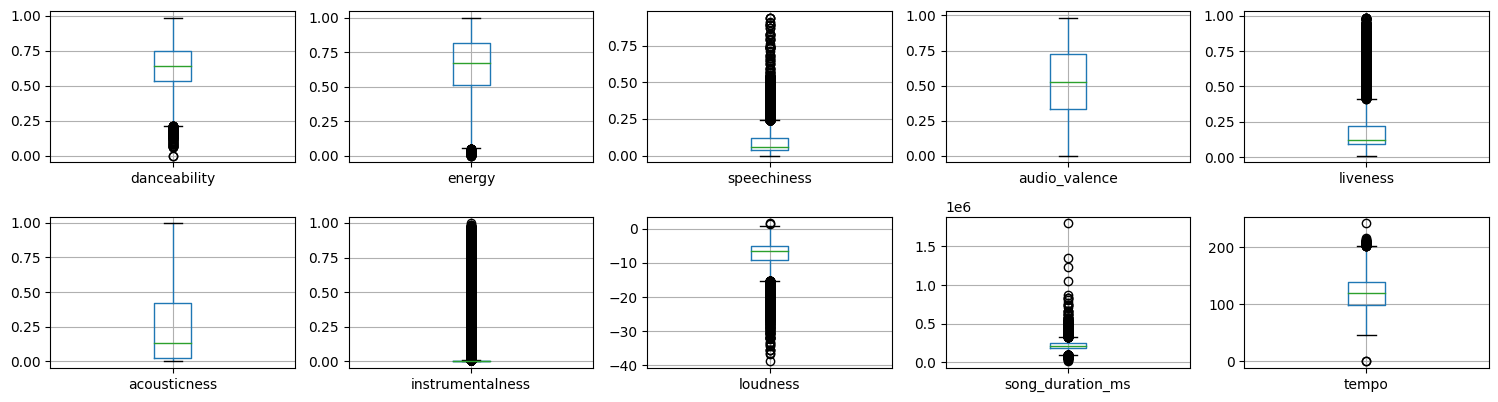

In [ ]:
#Visualising the numeric features

print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

# <center> 3. Data Preprocessing

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


In [ ]:
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape


audio_mode

time_signature
key


(14924, 27)

In [ ]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('Before removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,1,0,0,0,0,0,0,0,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,0,0,0,0,1,0
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0,0.1240,...,0,0,1,0,0,0,0,0,0,0


Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


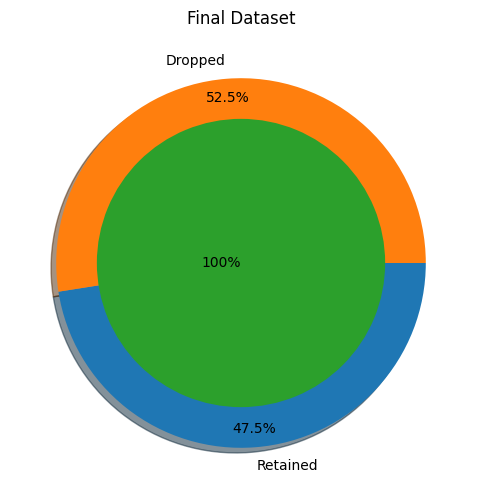

In [ ]:
#Final Dataset size Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

---

# <center> 4. Data Manipulation

In [ ]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (8950, 26) (8950,) 
Training set  --->  (7160, 26) (7160,) 
Testing set   --->  (1790, 26)  (1790,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

---

# <center> 5. Feature Selection/Extraction

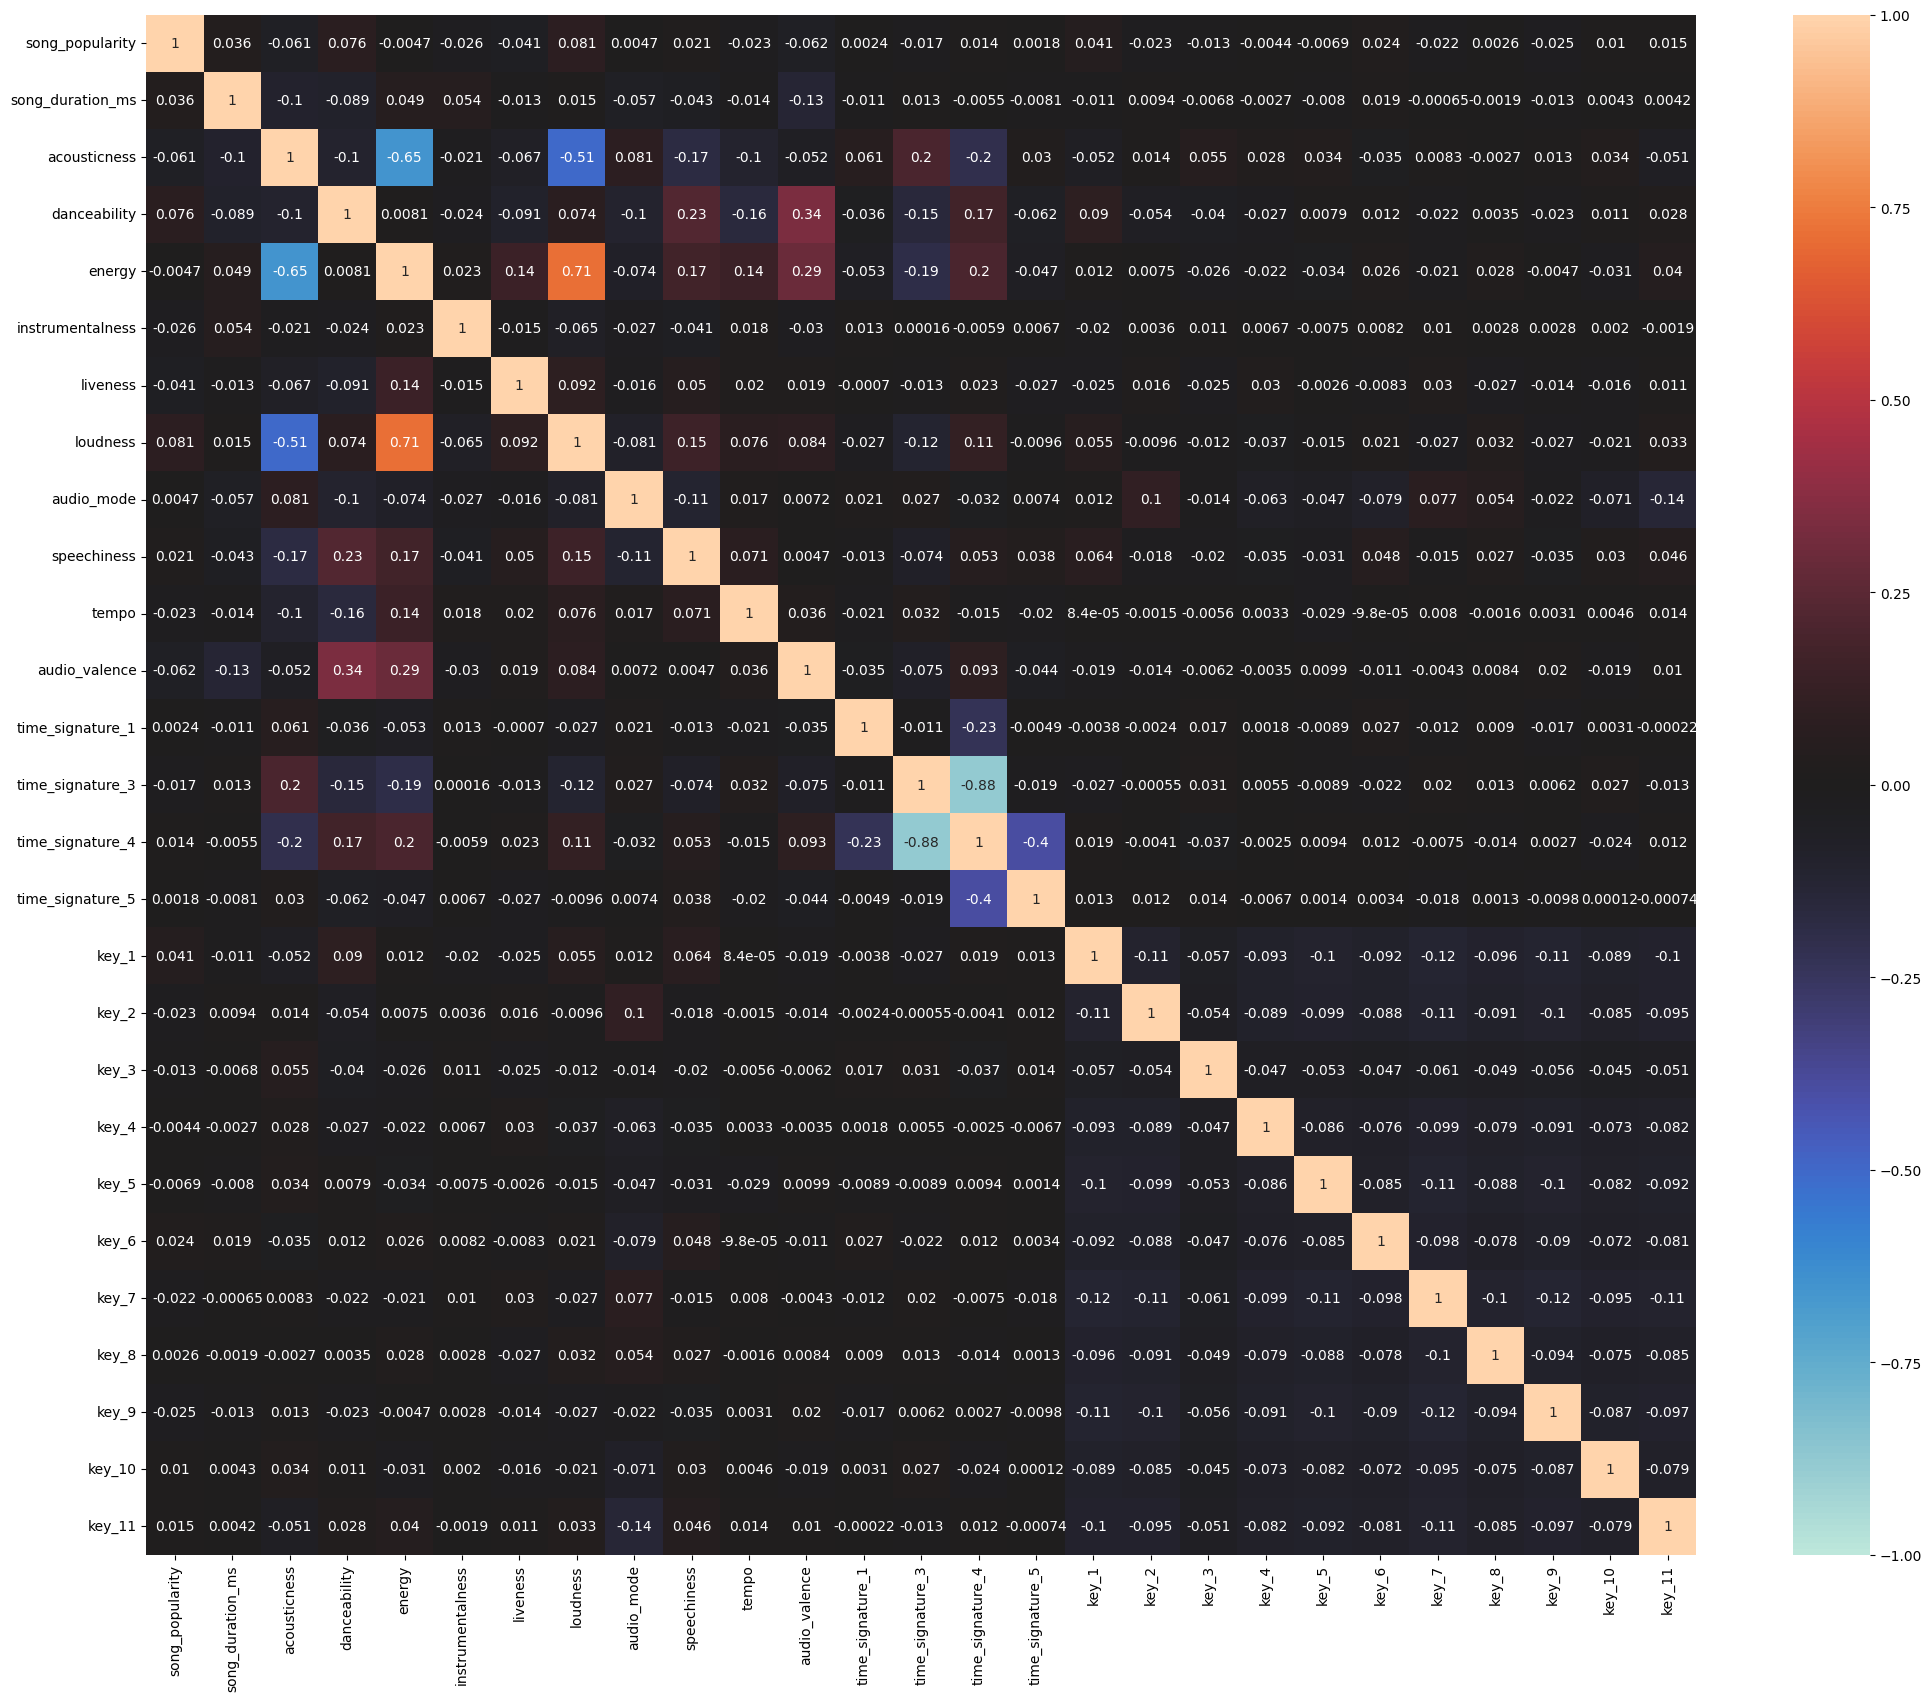

In [ ]:
#Checking the correlation

plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

- There are strong multi-correlation between the features.

  We can fix these multicollinearity with two techniques:
  1. Manual Method - Variance Inflation Factor (VIF)
  2. Automatic Method - Recursive Feature Elimination (RFE)
  3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['time_signature_4', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9', 'key_2', 'loudness', 'audio_mode', 'key_5', 'speechiness', 'audio_valence', 'key_4', 'key_6', 'key_3', 'key_8']


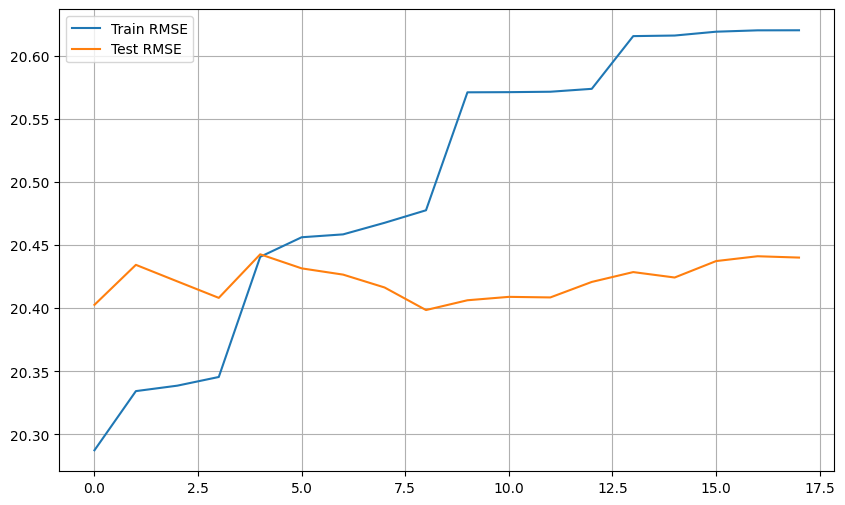

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

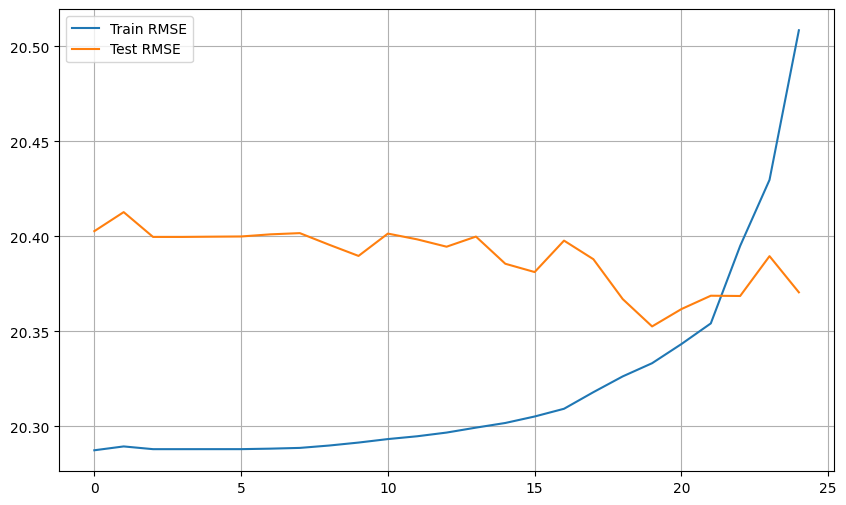

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

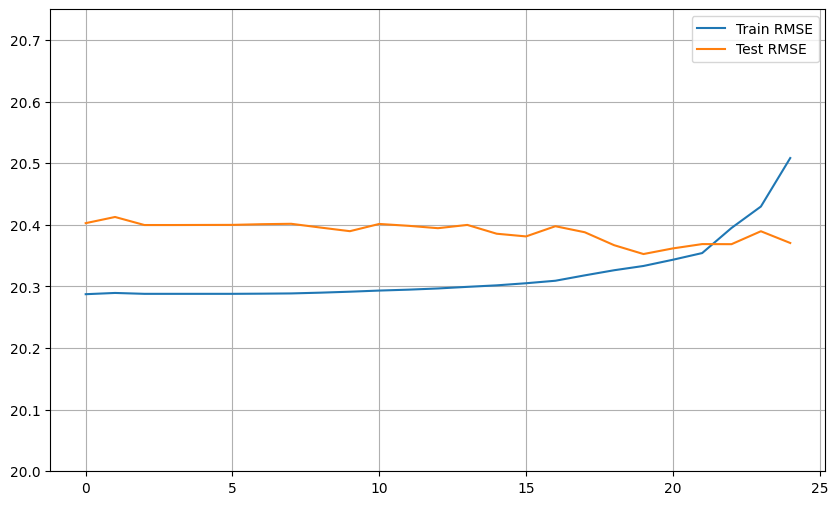

In [ ]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.ylim([20,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

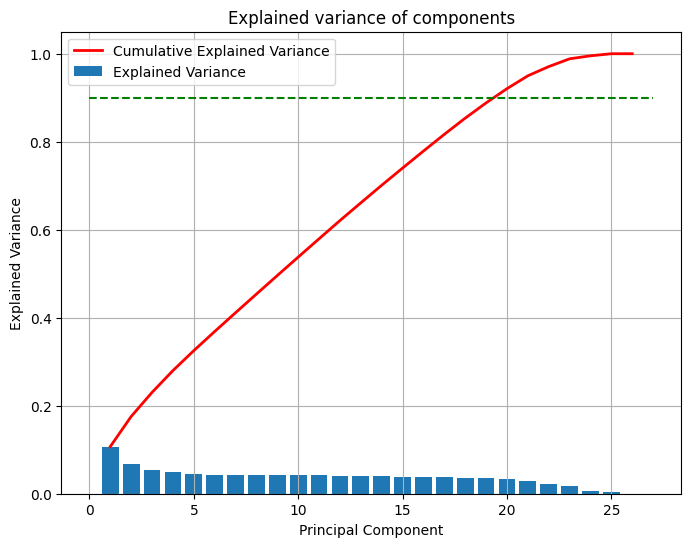

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

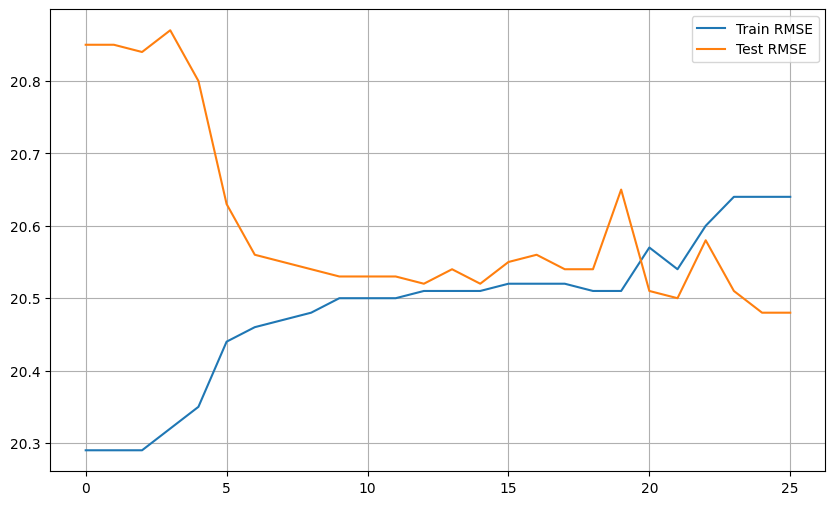

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

-
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most  features using manual RFE Technique. But we skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [ ]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-df.shape[1]+10)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

20.318048532828218
20.388036077109874


---

# <center> 6. Predictive Modelling

In [ ]:
#We first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

## Objective:
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


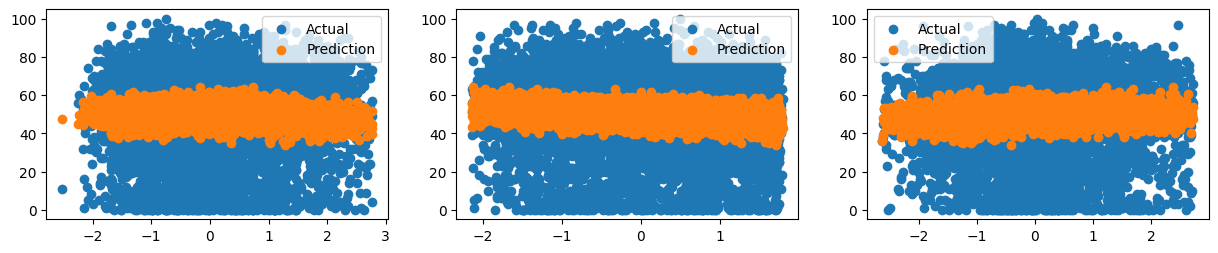



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.03718837012062659
Residual Sum of Squares (RSS) on Training set  ---> 2946922.186462853
Mean Squared Error (MSE) on Training set       ---> 411.58131095849905
Root Mean Squared Error (RMSE) on Training set ---> 20.28746684429821

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0033984544902754266
Residual Sum of Squares (RSS) on Training set  ---> 745130.5947039996
Mean Squared Error (MSE) on Training set       ---> 416.27407525363105
Root Mean Squared Error (RMSE) on Training set ---> 20.402795770522015

--------------------Residual Plots--------------------


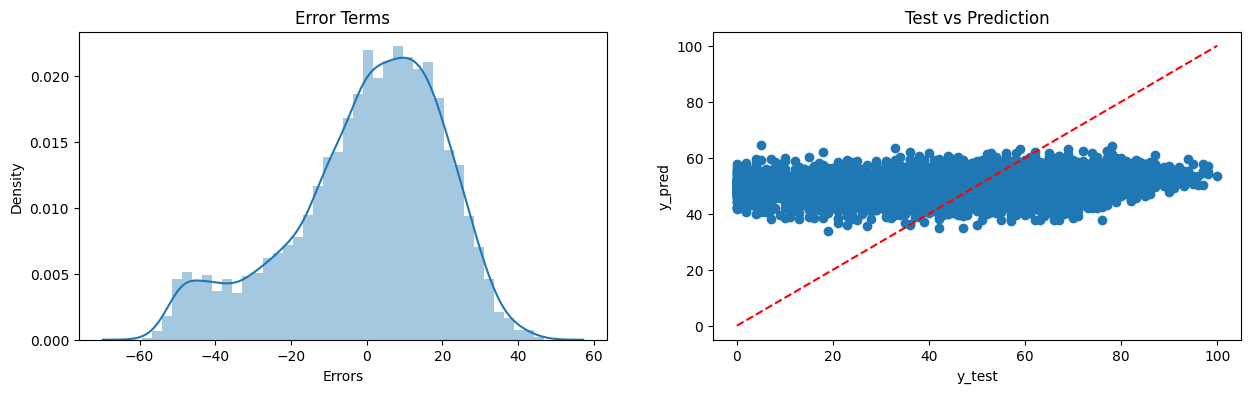

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


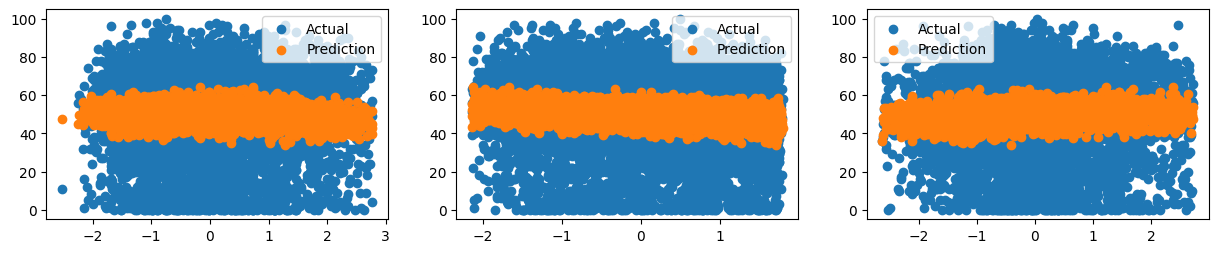



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.037189091772393934
Residual Sum of Squares (RSS) on Training set  ---> 2946919.977669837
Mean Squared Error (MSE) on Training set       ---> 411.5810024678543
Root Mean Squared Error (RMSE) on Training set ---> 20.28745924131098

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0034207109152710746
Residual Sum of Squares (RSS) on Training set  ---> 745113.9542088411
Mean Squared Error (MSE) on Training set       ---> 416.2647788876207
Root Mean Squared Error (RMSE) on Training set ---> 20.40256794836426

--------------------Residual Plots--------------------


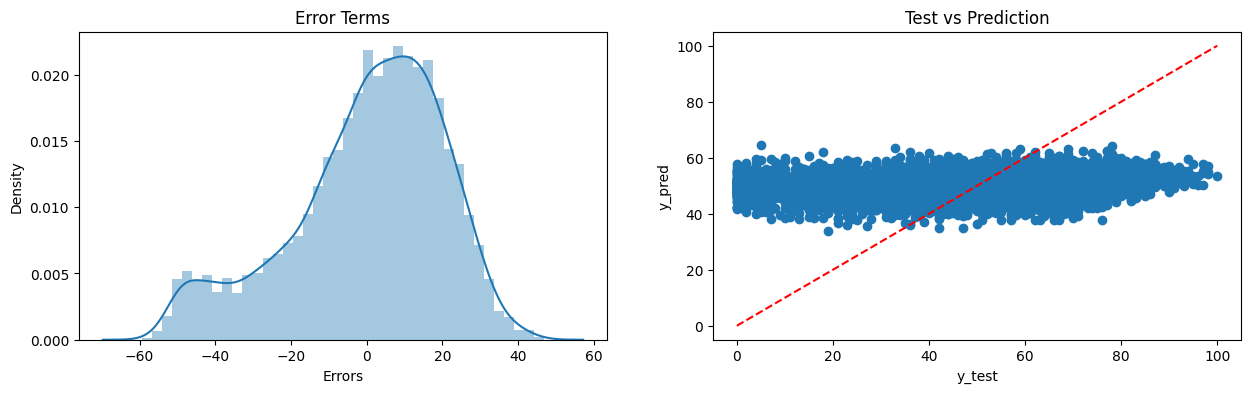

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

## 6c. Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


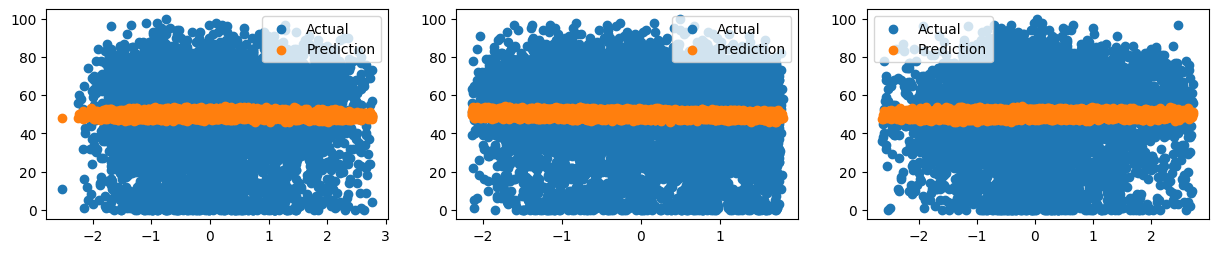



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.015140165780251126
Residual Sum of Squares (RSS) on Training set  ---> 3014406.14752641
Mean Squared Error (MSE) on Training set       ---> 421.00644518525286
Root Mean Squared Error (RMSE) on Training set ---> 20.51844158763654

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007117147140071945
Residual Sum of Squares (RSS) on Training set  ---> 742350.234109388
Mean Squared Error (MSE) on Training set       ---> 414.72080117842904
Root Mean Squared Error (RMSE) on Training set ---> 20.364694968951266

--------------------Residual Plots--------------------


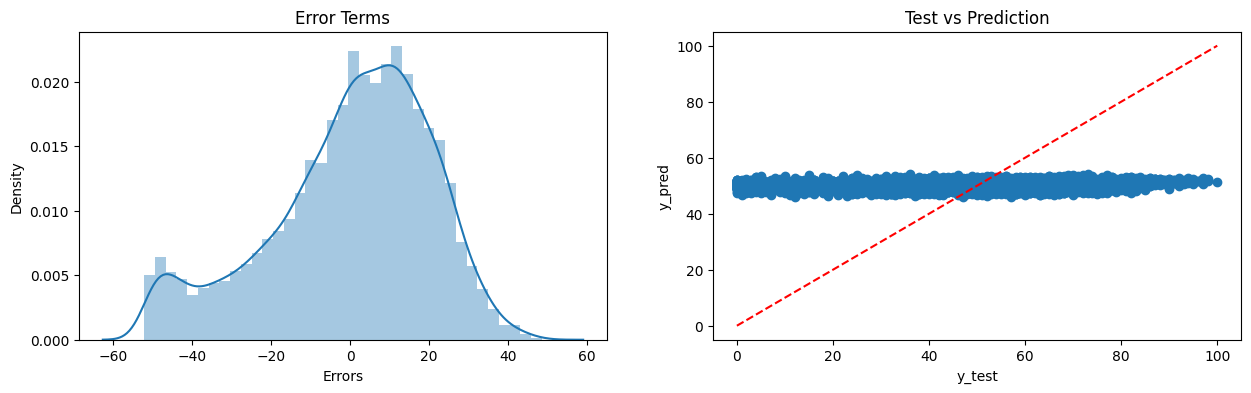

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


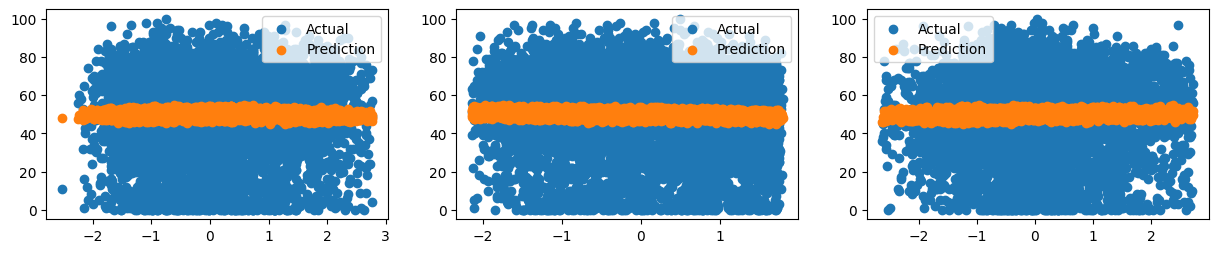



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019205092299083293
Residual Sum of Squares (RSS) on Training set  ---> 3001964.438501573
Mean Squared Error (MSE) on Training set       ---> 419.26877632703537
Root Mean Squared Error (RMSE) on Training set ---> 20.476053729345296

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007624464892474925
Residual Sum of Squares (RSS) on Training set  ---> 741970.9270731355
Mean Squared Error (MSE) on Training set       ---> 414.50889780622094
Root Mean Squared Error (RMSE) on Training set ---> 20.359491590072206

--------------------Residual Plots--------------------


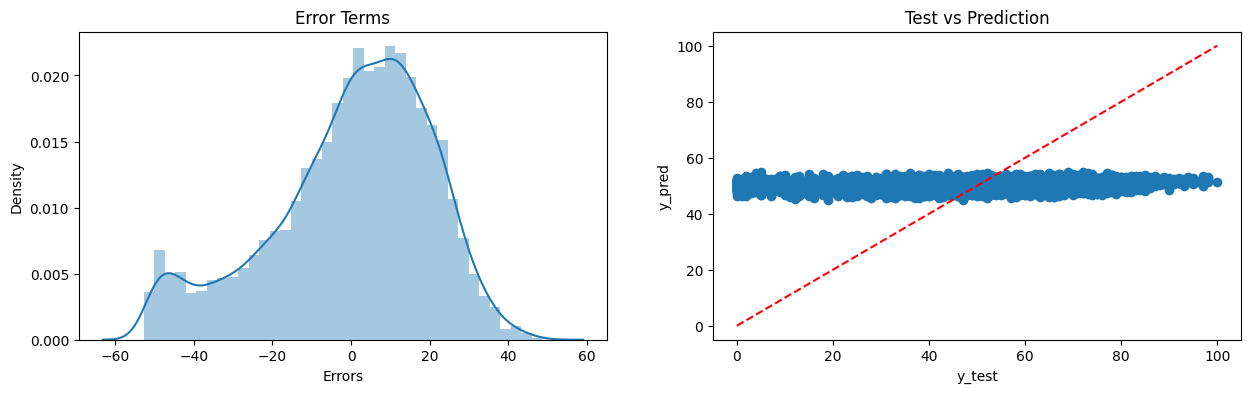

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

In [ ]:
#Checking polynomial regression performance on various degrees

'''Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,5e-12])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()'''

"Trr=[]; Tss=[]\nn_degree=5\n\nfor i in range(2,n_degree):\n    #print(f'{i} Degree')\n    poly_reg = PolynomialFeatures(degree=i)\n    X_poly = poly_reg.fit_transform(Train_X_std)\n    X_poly1 = poly_reg.fit_transform(Test_X_std)\n    LR = LinearRegression()\n    LR.fit(X_poly, Train_Y)\n\n    pred1 = LR.predict(X_poly)\n    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))\n\n    pred2 = LR.predict(X_poly1)\n    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))\n\nplt.figure(figsize=[15,6])\nplt.subplot(1,2,1)\nplt.plot(range(2,n_degree),Trr, label='Training')\nplt.plot(range(2,n_degree),Tss, label='Testing')\n#plt.plot([1,4],[1,4],'b--')\nplt.title('Polynomial Regression Fit')\n#plt.ylim([0,5])\nplt.xlabel('Degree')\nplt.ylabel('RMSE')\nplt.grid()\nplt.legend()\n#plt.xticks()\n\nplt.subplot(1,2,2)\nplt.plot(range(2,n_degree),Trr, label='Training')\nplt.plot(range(2,n_degree),Tss, label='Testing')\nplt.title('Polynomial Regression Fit')\nplt.ylim([0,5e-12])\nplt.xlabel('De

- We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


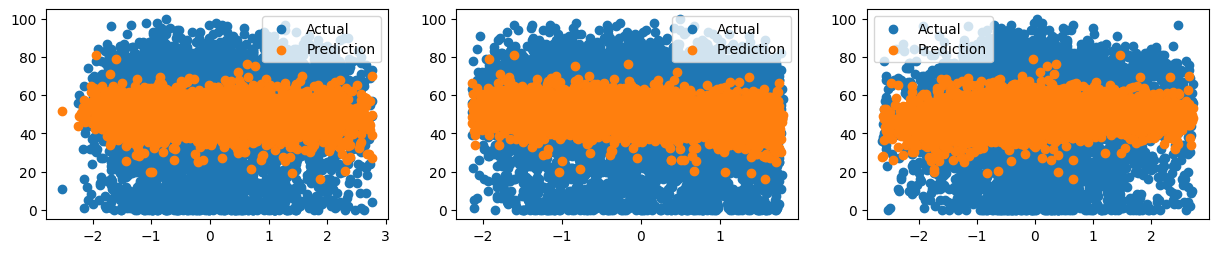



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.07763962035838079
Residual Sum of Squares (RSS) on Training set  ---> 2823111.1697526234
Mean Squared Error (MSE) on Training set       ---> 394.28926951852276
Root Mean Squared Error (RMSE) on Training set ---> 19.856718498244437

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -1.6217484302645014e+17
Residual Sum of Squares (RSS) on Training set  ---> 1.2125351177186933e+23
Mean Squared Error (MSE) on Training set       ---> 6.773939205132366e+19
Root Mean Squared Error (RMSE) on Training set ---> 8230394404.360197

--------------------Residual Plots--------------------


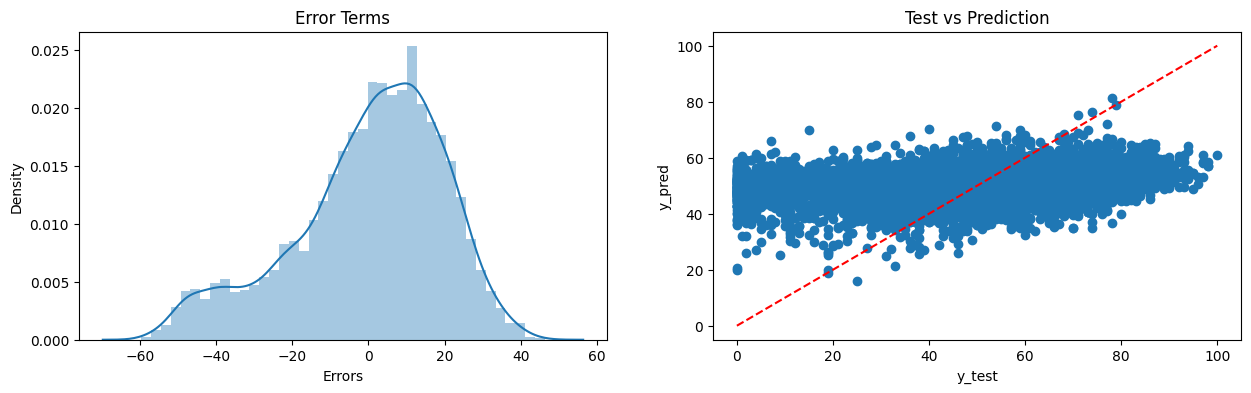

In [ ]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

### 6f. Comparing the Evaluation Metics of the Models

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.037188,3.398454e-03,2.946922e+06,7.451306e+05,411.581311,4.162741e+02,20.287467,2.040280e+01
Ridge Linear Regression (RLR),0.037189,3.420711e-03,2.946920e+06,7.451140e+05,411.581002,4.162648e+02,20.287459,2.040257e+01
Lasso Linear Regression (LLR),0.015140,7.117147e-03,3.014406e+06,7.423502e+05,421.006445,4.147208e+02,20.518442,2.036469e+01
Elastic-Net Regression (ENR),0.019205,7.624465e-03,3.001964e+06,7.419709e+05,419.268776,4.145089e+02,20.476054,2.035949e+01
Polynomial Regression (PNR),0.077640,-1.621748e+17,2.823111e+06,1.212535e+23,394.289270,6.773939e+19,19.856718,8.230394e+09


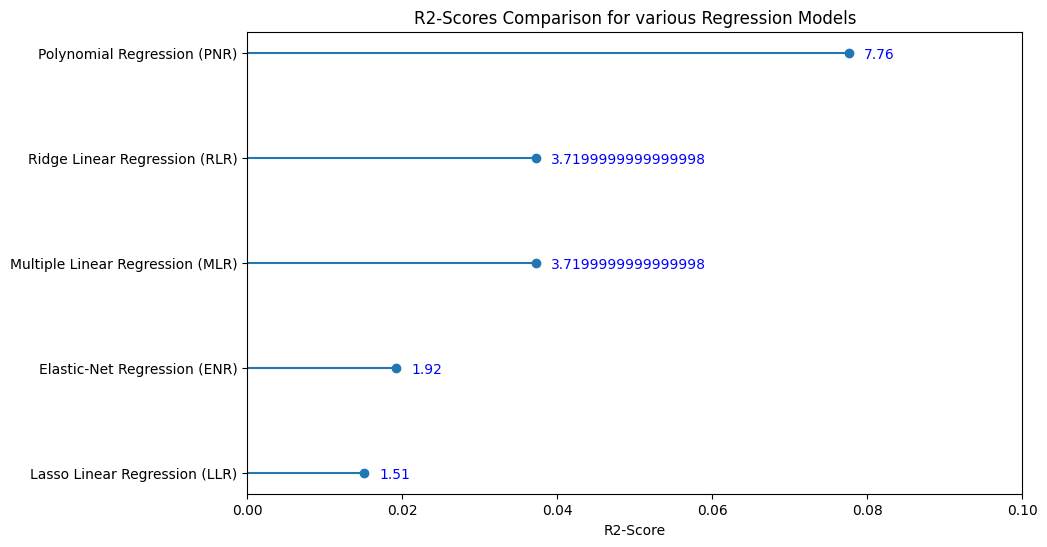

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.1])
plt.show()

- From the above plot, it is clear that the polynomial regresion models is best in termns of performing model well

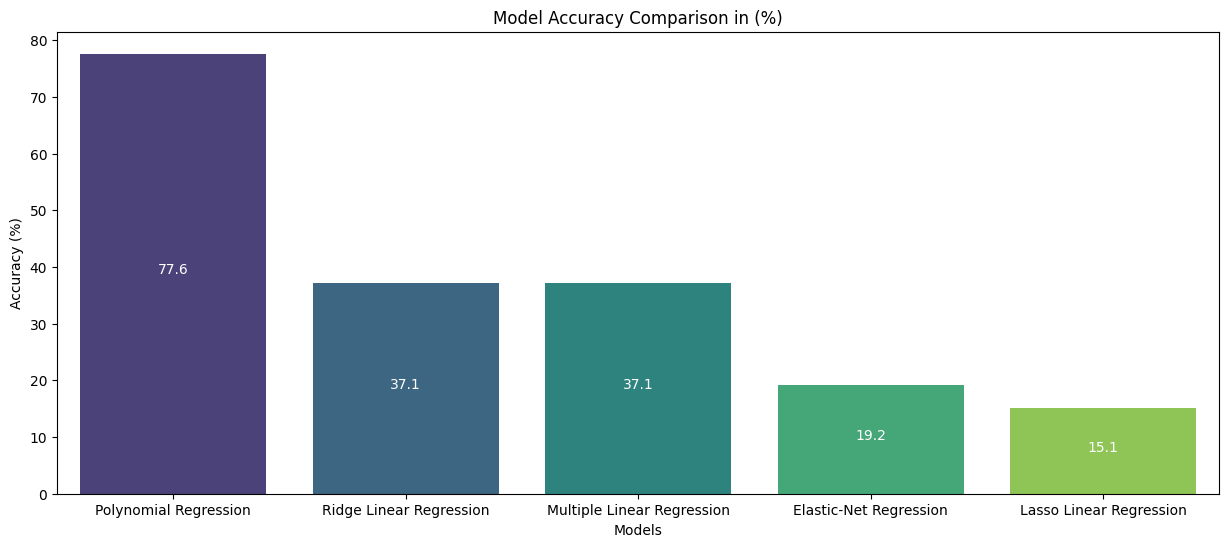

In [ ]:
# Accuarcy shown in percentage form
model_name = ['Polynomial Regression', 'Ridge Linear Regression', 'Multiple Linear Regression', 'Elastic-Net Regression','Lasso Linear Regression']
accuracy_values = [7.76, 3.71, 3.71, 1.92, 1.51]
accuracy_percentage = [ (acc * 100)/10 for acc in Accuracy_values ]

plt.figure(figsize=(15,6))
ax=sns.barplot(x=model_name, y=accuracy_percentage, palette='viridis')
for i,v in enumerate(accuracy_percentage):
  ax.text(i, v/2, str(v) ,ha='center', color='White')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison in (%)')

plt.show()

# <center> 7. Project Outcomes & Conclusions

### Here are some points of the project:
- The Dataset was quiet small with just 18835 samples & after preprocessing 33.4% of the datasamples were dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-2) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

# _____________◦•●◉✿ 𝐉𝐚𝐢 𝐒𝐡𝐫𝐞𝐞 𝐑𝐚𝐦 ✿◉●•◦_____________


